<a href="https://colab.research.google.com/github/HarinduR/Bank_Marketing_Using_Machine_Learning/blob/master/model_building.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model building(Random Forest)

## Train the model using Preproccesing dataset


### Import dataset  

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score

In [3]:
data = pd.read_csv("/content/drive/MyDrive/MLCW/preprocessed.csv")

In [4]:
data.duplicated().sum()

107

In [5]:
data = data.drop_duplicates()

In [6]:
print(data['y'].value_counts())

y
no     34423
yes     4577
Name: count, dtype: int64


In [7]:
print(data['y'].value_counts(normalize=True) * 100)

y
no     88.264103
yes    11.735897
Name: proportion, dtype: float64


In [8]:
data.shape

(39000, 47)

In [9]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 39000 entries, 0 to 39106
Data columns (total 47 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            39000 non-null  float64
 1   campaign                       39000 non-null  int64  
 2   pdays                          39000 non-null  int64  
 3   previous                       39000 non-null  int64  
 4   cons.price.idx                 39000 non-null  float64
 5   cons.conf.idx                  39000 non-null  float64
 6   y                              39000 non-null  object 
 7   PC1                            39000 non-null  float64
 8   PC2                            39000 non-null  float64
 9   education_basic.6y             39000 non-null  bool   
 10  education_basic.9y             39000 non-null  bool   
 11  education_high.school          39000 non-null  bool   
 12  education_illiterate           39000 non-null  bool

### Split dataset

In [10]:
X = data.drop('y', axis=1)
y = data['y']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set size (X_train):", X_train.shape)
print("Test set size (X_test):", X_test.shape)

Training set size (X_train): (31200, 46)
Test set size (X_test): (7800, 46)


In [12]:
train_dist_balanced = y_train.value_counts(normalize=True).sort_index()
test_dist_balanced = y_test.value_counts(normalize=True).sort_index()

distribution_dataframe = pd.DataFrame({
    'Training Set': train_dist_balanced,
    'Test Set': test_dist_balanced
})

print("Target Distribution:")
print(distribution_dataframe)

Target Distribution:
     Training Set  Test Set
y                          
no       0.882628  0.882692
yes      0.117372  0.117308


In [13]:
print("Training Set Target Distribution:")
print(y_train.value_counts())

print("\nTest Set Target Distribution:")
print(y_test.value_counts())

Training Set Target Distribution:
y
no     27538
yes     3662
Name: count, dtype: int64

Test Set Target Distribution:
y
no     6885
yes     915
Name: count, dtype: int64


### Apply SMOTE

In [14]:
print(data['y'].value_counts())

y
no     34423
yes     4577
Name: count, dtype: int64


<ipython-input-15-ae88a360bafe>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='y', data=data, palette='viridis')


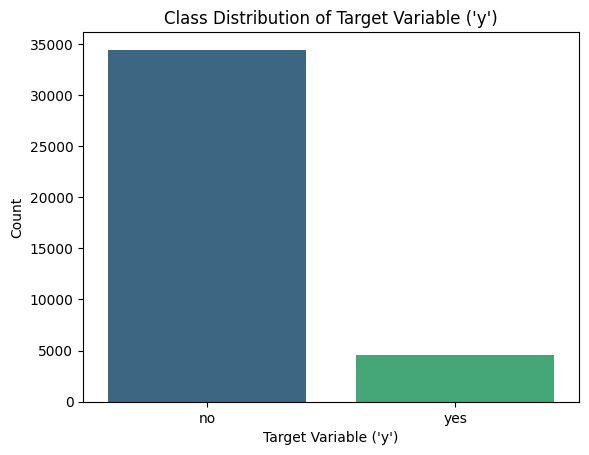

In [15]:
sns.countplot(x='y', data=data, palette='viridis')
plt.title("Class Distribution of Target Variable ('y')")
plt.xlabel("Target Variable ('y')")
plt.ylabel("Count")
plt.show()

In [16]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

In [17]:
print("Before SMOTE:", Counter(y_train))

Before SMOTE: Counter({'no': 27538, 'yes': 3662})


In [18]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [19]:
print("After SMOTE:", Counter(y_train_smote))

After SMOTE: Counter({'no': 27538, 'yes': 27538})


<ipython-input-20-76f289daddde>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train_smote, palette='viridis')


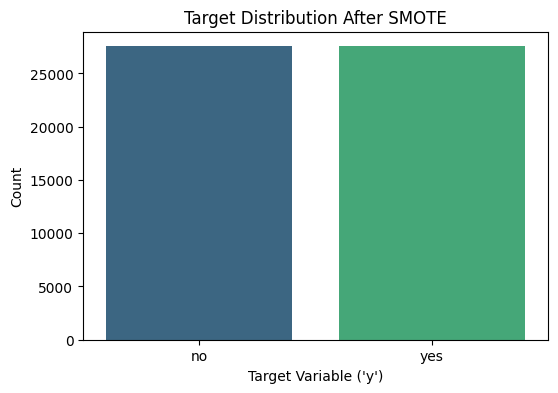

In [20]:
plt.figure(figsize=(6, 4))
sns.countplot(x=y_train_smote, palette='viridis')
plt.title("Target Distribution After SMOTE")
plt.xlabel("Target Variable ('y')")
plt.ylabel("Count")
plt.show()

In [21]:
print("Class distribution after SMOTE:", dict(pd.Series(y_train_smote).value_counts()))

Class distribution after SMOTE: {'no': 27538, 'yes': 27538}


In [22]:
data.duplicated().sum()

0

### Encode Y value

In [23]:
y_train_encoded = y_train_smote.map({'yes': 1, 'no': 0}).values
y_test_encoded = y_test.map({'yes': 1, 'no': 0}).values

print("Encoded y_train values :", y_train_encoded[:5])
print("Encoded y_test values :", y_test_encoded[:5])

Encoded y_train values : [0 0 0 0 0]
Encoded y_test values : [0 0 0 0 0]


### Build Random Forest Model

In [24]:
rf_model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10, max_features='sqrt', class_weight='balanced')

rf_model.fit(X_train_smote, y_train_encoded)

y_pred = rf_model.predict(X_test)

#### Training Accuracy

In [25]:
y_pred_train = rf_model.predict(X_train_smote)

accuracy_train = accuracy_score(y_train_encoded, y_pred_train)

print(f"Training Accuracy: {accuracy_train}")

Training Accuracy: 0.8235165952501997


#### Testing Accuracy

In [26]:
accuracy = accuracy_score(y_test_encoded, y_pred)
precision = precision_score(y_test_encoded, y_pred)
recall = recall_score(y_test_encoded, y_pred)
f1 = f1_score(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC Score: {roc_auc}")

Accuracy: 0.8678205128205129
Precision: 0.4533762057877814
Recall: 0.6163934426229508
F1 Score: 0.5224641037517369
ROC AUC Score: 0.7588140052620926


In [27]:
print("\nClassification Report:\n", classification_report(y_test_encoded, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.90      0.92      6885
           1       0.45      0.62      0.52       915

    accuracy                           0.87      7800
   macro avg       0.70      0.76      0.72      7800
weighted avg       0.89      0.87      0.88      7800



#### Cross Validation Accuracy

In [28]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy: {scores.mean()}")


Cross-Validation Accuracy: 0.8523717948717948


#### Confusion Matrix

In [29]:
print("\nConfusion Matrix:\n", confusion_matrix(y_test_encoded, y_pred))


Confusion Matrix:
 [[6205  680]
 [ 351  564]]


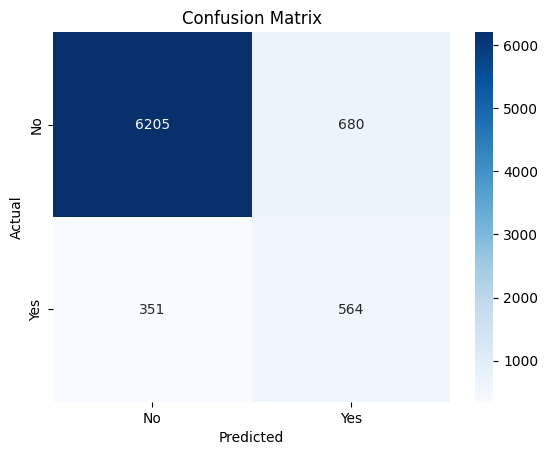

In [30]:
conf_matrix = confusion_matrix(y_test_encoded, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Hyperparameter Tuning

#### Apply Grid Search

In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [32]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'class_weight': ['balanced', None]
}

In [33]:
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    verbose=2,
    n_jobs=-1
)

In [34]:
grid_search.fit(X_train_smote, y_train_encoded)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'class_weight': ['balanced', None],
                         'max_depth': [10, 20, 30, None],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy', verbose=2)

In [35]:
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

Best Hyperparameters: {'class_weight': 'balanced', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Cross-Validation Accuracy: 0.9311517238492041


In [36]:
best_rf_model = grid_search.best_estimator_

best_rf_model.fit(X_train_smote, y_train_encoded)

RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=42)

In [37]:
y_pred = best_rf_model.predict(X_test)
y_pred_train = best_rf_model.predict(X_train_smote)

In [38]:
accuracy_train = accuracy_score(y_train_encoded, y_pred_train)
print(f"Training Accuracy: {accuracy_train}")

Training Accuracy: 0.9965320647832087


In [39]:
accuracy = accuracy_score(y_test_encoded, y_pred)
precision = precision_score(y_test_encoded, y_pred)
recall = recall_score(y_test_encoded, y_pred)
f1 = f1_score(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC Score: {roc_auc}")

Accuracy: 0.8756410256410256
Precision: 0.4645161290322581
Recall: 0.39344262295081966
F1 Score: 0.4260355029585799
ROC AUC Score: 0.6665833303570365


In [40]:
print("\nConfusion Matrix:\n", confusion_matrix(y_test_encoded, y_pred))



Confusion Matrix:
 [[6470  415]
 [ 555  360]]


#### Apply Random Search

In [32]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
import numpy as np

In [33]:
param_distributions = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

In [34]:
random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42, class_weight='balanced'),
    param_distributions=param_distributions,
    n_iter=20,
    scoring='accuracy',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

In [35]:
random_search.fit(X_train_smote, y_train_encoded)

print("Best Hyperparameters:", random_search.best_params_)
print("Best Cross-Validation Accuracy:", random_search.best_score_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Hyperparameters: {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': False}
Best Cross-Validation Accuracy: 0.9270121765691532


In [36]:
best_rf_model = random_search.best_estimator_

best_rf_model.fit(X_train_smote, y_train_encoded)

RandomForestClassifier(bootstrap=False, class_weight='balanced', max_depth=20,
                       n_estimators=400, random_state=42)

In [37]:
y_pred_train = best_rf_model.predict(X_train_smote)
accuracy_train = accuracy_score(y_train_encoded, y_pred_train)
print(f"Training Accuracy: {accuracy_train}")

Training Accuracy: 0.9752342218026


In [38]:
y_pred = best_rf_model.predict(X_test)
accuracy = accuracy_score(y_test_encoded, y_pred)
precision = precision_score(y_test_encoded, y_pred)
recall = recall_score(y_test_encoded, y_pred)
f1 = f1_score(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC Score: {roc_auc}")

Accuracy: 0.8835897435897436
Precision: 0.5050071530758226
Recall: 0.38579234972677595
F1 Score: 0.43742255266418834
ROC AUC Score: 0.667769086991202


In [40]:
print("\nClassification Report:\n", classification_report(y_test_encoded, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.95      0.94      6885
           1       0.51      0.39      0.44       915

    accuracy                           0.88      7800
   macro avg       0.71      0.67      0.69      7800
weighted avg       0.87      0.88      0.88      7800



In [41]:
print("\nConfusion Matrix:\n", confusion_matrix(y_test_encoded, y_pred))


Confusion Matrix:
 [[6539  346]
 [ 562  353]]
